In [1]:
#### Notebook to predict the average next action that is predicted by dynamics 
#### plotted against the average next action that actually happens; 

In [20]:
import analysis_config
from online_analysis import util_fcns
from matplotlib import cm
import copy
import matplotlib as mpl

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
animal = 'grom'
model_set_number = 7; 
#dat_cond = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_cond_spec.pkl' %(model_set_number), 'rb'))
dat = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_task_spec_pls_gen.pkl' %(model_set_number), 'rb'))

In [4]:
##### For day, get decoder trials ####
day = 0; 

F, K = util_fcns.get_grom_decoder(day)
dyn_model = 'hist_1pos_0psh_0spksm_1_spksp_0'
model_type = 2; # General model 

spks = dat[day, 'spks']
pred_spks = dat[day, dyn_model][:, :, model_type]
trg = dat[day, 'trg']
tsk = dat[day, 'task']
pos = dat[day, 'pos']
vel = dat[day, 'vel']
trl = dat[day, 'trl']
push = dat[day, 'np']

In [5]:
### Segment up the pushes into discrete bins ###
mag_boundaries = pickle.load(open(analysis_config.config['grom_pref'] + 'radial_boundaries_fit_based_on_perc_feb_2019.pkl'))
command_bins = util_fcns.commands2bins([push], mag_boundaries, animal, day, vel_ix = [0,1], ndiv=8)[0]

<IPython.core.display.Javascript object>


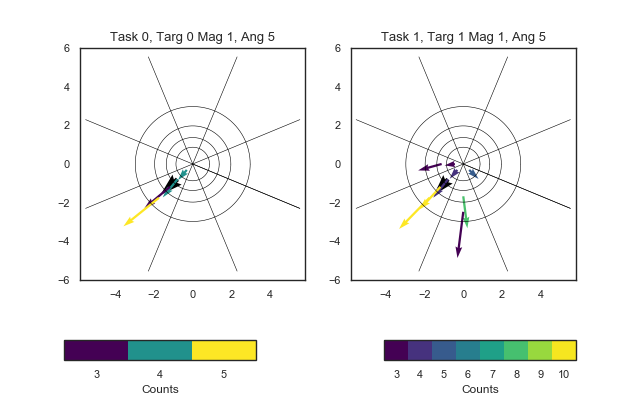

Adding followup tsk 1, m 0, a 4
Adding followup tsk 0, m 0, a 5
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 0, a 7
Adding followup tsk 1, m 1, a 4
Adding followup tsk 0, m 1, a 5
Adding followup tsk 1, m 1, a 5
Adding followup tsk 0, m 2, a 5
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 3, a 5
Adding followup tsk 1, m 3, a 5
Adding followup tsk 1, m 3, a 6
Co mx = 5, mn = 3
Obs mx = 10, mn = 3
Len arrows_dict[0]: 4
Len arrows_dict[1]: 9


<IPython.core.display.Javascript object>


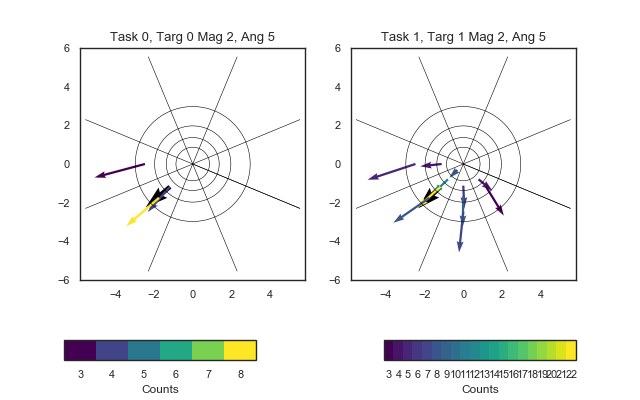

Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 1, a 4
Adding followup tsk 1, m 1, a 5
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 1, a 7
Adding followup tsk 0, m 2, a 5
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 6
Adding followup tsk 1, m 2, a 7
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 0, m 3, a 5
Adding followup tsk 1, m 3, a 5
Adding followup tsk 1, m 3, a 6
Co mx = 8, mn = 3
Obs mx = 22, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 11


<IPython.core.display.Javascript object>


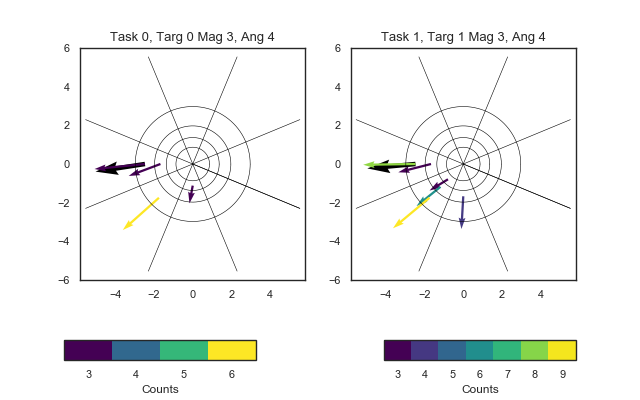

Adding followup tsk 1, m 1, a 5
Adding followup tsk 0, m 1, a 6
Adding followup tsk 0, m 2, a 4
Adding followup tsk 1, m 2, a 4
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 0, m 3, a 5
Adding followup tsk 1, m 3, a 5
Co mx = 6, mn = 3
Obs mx = 9, mn = 3
Len arrows_dict[0]: 4
Len arrows_dict[1]: 6


<IPython.core.display.Javascript object>


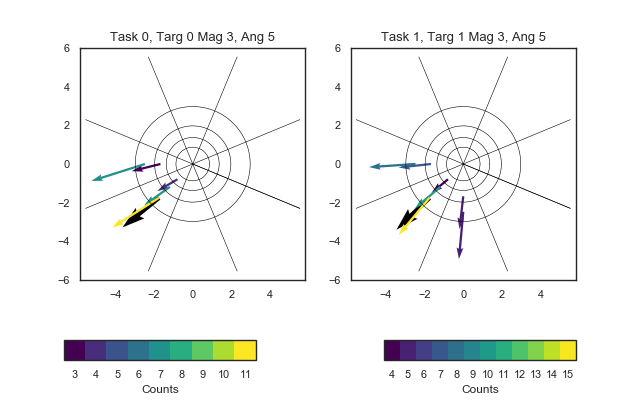

Adding followup tsk 0, m 1, a 5
Adding followup tsk 1, m 1, a 5
Adding followup tsk 0, m 2, a 4
Adding followup tsk 1, m 2, a 4
Adding followup tsk 0, m 2, a 5
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 0, m 3, a 5
Adding followup tsk 1, m 3, a 5
Adding followup tsk 1, m 3, a 6
Co mx = 11, mn = 3
Obs mx = 15, mn = 4
Len arrows_dict[0]: 5
Len arrows_dict[1]: 7


<IPython.core.display.Javascript object>


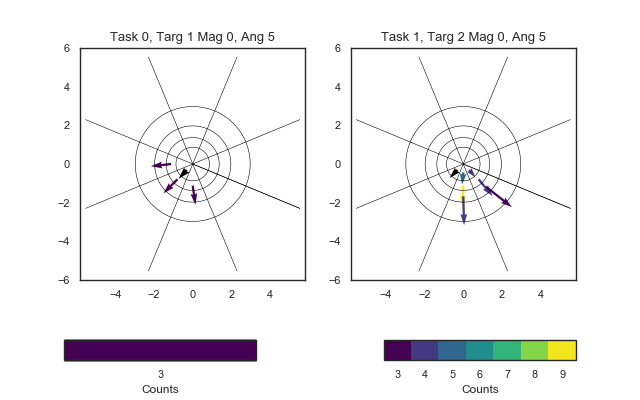

Adding followup tsk 1, m 0, a 6
Adding followup tsk 1, m 0, a 7
Adding followup tsk 0, m 1, a 4
Adding followup tsk 0, m 1, a 5
Adding followup tsk 0, m 1, a 6
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 1, a 7
Adding followup tsk 1, m 2, a 6
Adding followup tsk 1, m 2, a 7
Co mx = 3, mn = 3
Obs mx = 9, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 6


<IPython.core.display.Javascript object>


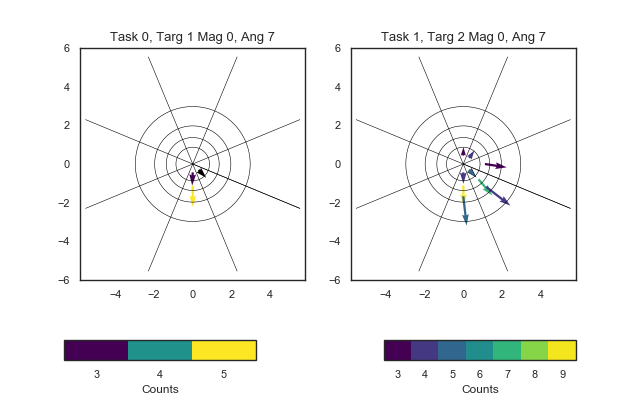

Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 0, m 0, a 6
Adding followup tsk 1, m 0, a 6
Adding followup tsk 1, m 0, a 7
Adding followup tsk 1, m 1, a 0
Adding followup tsk 0, m 1, a 6
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 1, a 7
Adding followup tsk 1, m 2, a 6
Adding followup tsk 1, m 2, a 7
Co mx = 5, mn = 3
Obs mx = 9, mn = 3
Len arrows_dict[0]: 2
Len arrows_dict[1]: 9


<IPython.core.display.Javascript object>


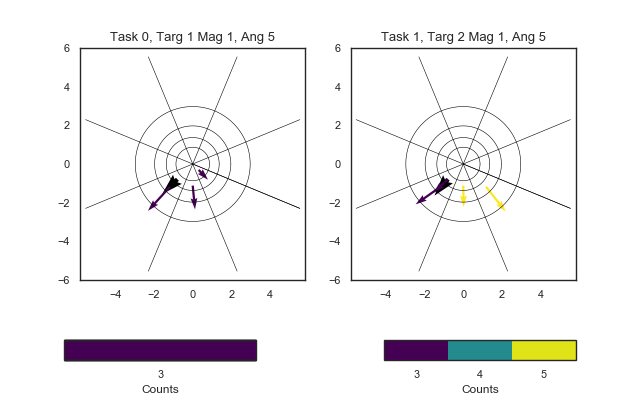

Adding followup tsk 0, m 0, a 7
Adding followup tsk 1, m 1, a 5
Adding followup tsk 0, m 1, a 6
Adding followup tsk 1, m 1, a 6
Adding followup tsk 0, m 2, a 5
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 7
Co mx = 3, mn = 3
Obs mx = 5, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 4


<IPython.core.display.Javascript object>


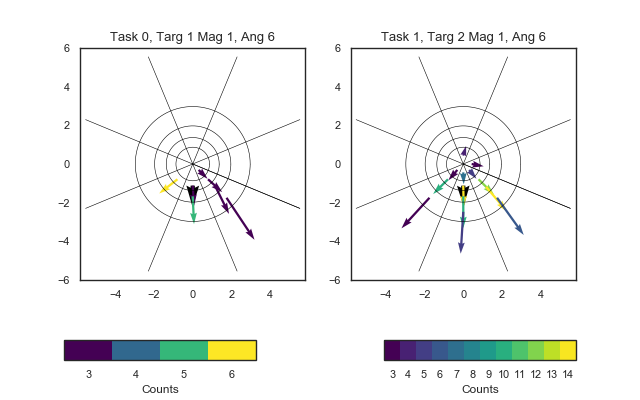

Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 0, a 6
Adding followup tsk 0, m 0, a 7
Adding followup tsk 1, m 0, a 7
Adding followup tsk 0, m 1, a 5
Adding followup tsk 1, m 1, a 5
Adding followup tsk 0, m 1, a 6
Adding followup tsk 1, m 1, a 6
Adding followup tsk 0, m 1, a 7
Adding followup tsk 1, m 1, a 7
Adding followup tsk 0, m 2, a 6
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 2, a 7
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 5
Adding followup tsk 1, m 3, a 6
Adding followup tsk 0, m 3, a 7
Adding followup tsk 1, m 3, a 7
Co mx = 6, mn = 3
Obs mx = 14, mn = 3
Len arrows_dict[0]: 7
Len arrows_dict[1]: 13


<IPython.core.display.Javascript object>


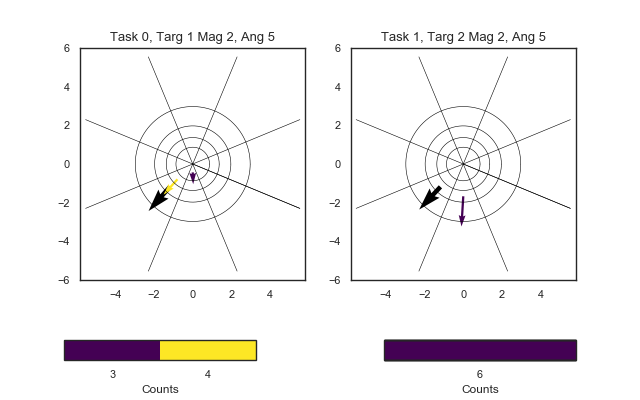

Adding followup tsk 0, m 0, a 6
Adding followup tsk 0, m 1, a 5
Adding followup tsk 1, m 2, a 6
Co mx = 4, mn = 3
Obs mx = 6, mn = 6
Len arrows_dict[0]: 2
Len arrows_dict[1]: 1


<IPython.core.display.Javascript object>


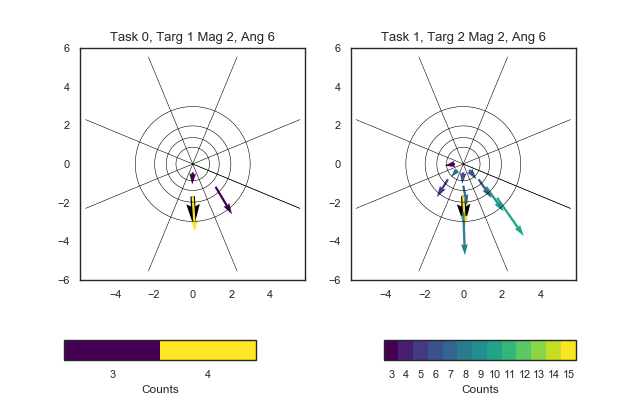

Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 0, a 5
Adding followup tsk 0, m 0, a 6
Adding followup tsk 1, m 0, a 6
Adding followup tsk 1, m 0, a 7
Adding followup tsk 1, m 1, a 5
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 1, a 7
Adding followup tsk 0, m 2, a 6
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 2, a 7
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 6
Adding followup tsk 1, m 3, a 7
Co mx = 4, mn = 3
Obs mx = 15, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 11


<IPython.core.display.Javascript object>


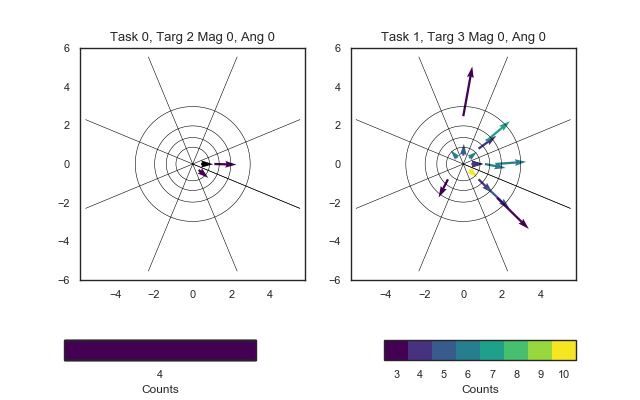

Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 3
Adding followup tsk 0, m 0, a 7
Adding followup tsk 1, m 0, a 7
Adding followup tsk 0, m 1, a 0
Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 5
Adding followup tsk 1, m 1, a 7
Adding followup tsk 1, m 2, a 0
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 2
Adding followup tsk 1, m 3, a 7
Co mx = 4, mn = 4
Obs mx = 10, mn = 3
Len arrows_dict[0]: 2
Len arrows_dict[1]: 14


<IPython.core.display.Javascript object>


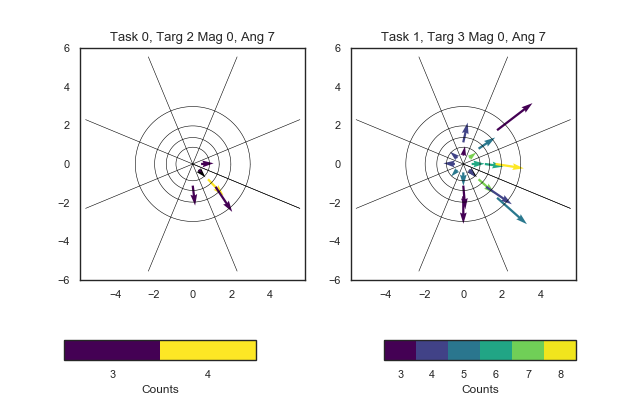

Adding followup tsk 0, m 0, a 0
Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 3
Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 0, a 6
Adding followup tsk 0, m 0, a 7
Adding followup tsk 1, m 0, a 7
Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 0, m 1, a 6
Adding followup tsk 1, m 1, a 6
Adding followup tsk 0, m 1, a 7
Adding followup tsk 1, m 1, a 7
Adding followup tsk 1, m 2, a 0
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 2, a 7
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 1
Adding followup tsk 1, m 3, a 7
Co mx = 4, mn = 3
Obs mx = 8, mn = 3
Len arrows_dict[0]: 5
Len arrows_dict[1]: 18


<IPython.core.display.Javascript object>


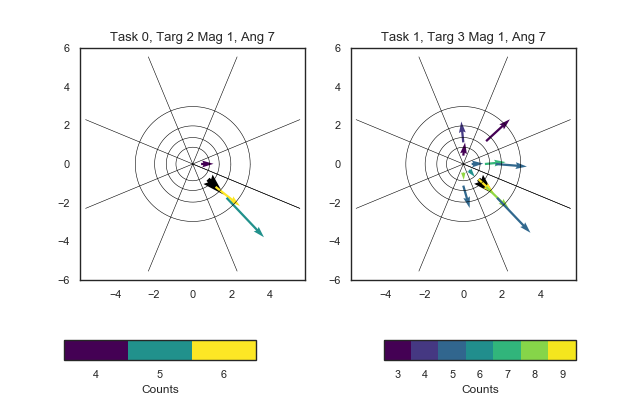

Adding followup tsk 0, m 0, a 0
Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 6
Adding followup tsk 1, m 0, a 7
Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 2
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 1, a 7
Adding followup tsk 1, m 2, a 0
Adding followup tsk 1, m 2, a 1
Adding followup tsk 0, m 2, a 7
Adding followup tsk 1, m 2, a 7
Adding followup tsk 0, m 3, a 7
Adding followup tsk 1, m 3, a 7
Co mx = 6, mn = 4
Obs mx = 9, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 12


<IPython.core.display.Javascript object>


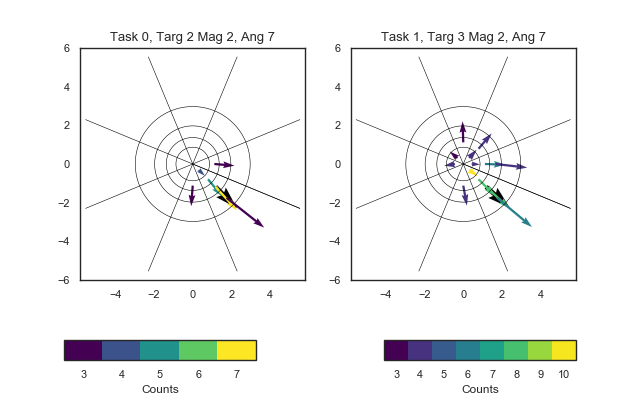

Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 3
Adding followup tsk 1, m 0, a 4
Adding followup tsk 0, m 0, a 7
Adding followup tsk 1, m 0, a 7
Adding followup tsk 0, m 1, a 0
Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 0, m 1, a 6
Adding followup tsk 1, m 1, a 6
Adding followup tsk 0, m 1, a 7
Adding followup tsk 1, m 1, a 7
Adding followup tsk 1, m 2, a 0
Adding followup tsk 0, m 2, a 7
Adding followup tsk 1, m 2, a 7
Adding followup tsk 0, m 3, a 7
Adding followup tsk 1, m 3, a 7
Co mx = 7, mn = 3
Obs mx = 10, mn = 3
Len arrows_dict[0]: 6
Len arrows_dict[1]: 13


<IPython.core.display.Javascript object>


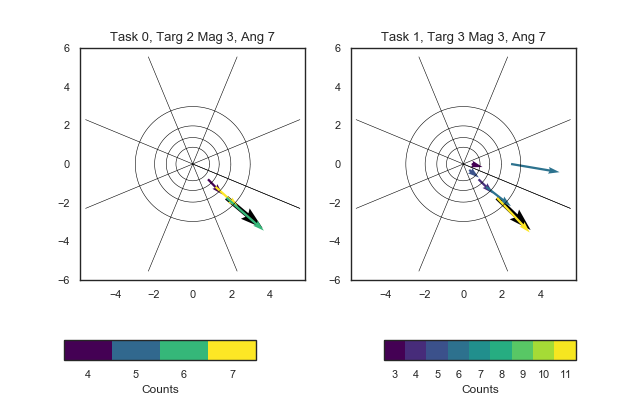

Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 7
Adding followup tsk 0, m 1, a 7
Adding followup tsk 1, m 1, a 7
Adding followup tsk 0, m 2, a 7
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 0
Adding followup tsk 0, m 3, a 7
Adding followup tsk 1, m 3, a 7
Co mx = 7, mn = 4
Obs mx = 11, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 6


<IPython.core.display.Javascript object>


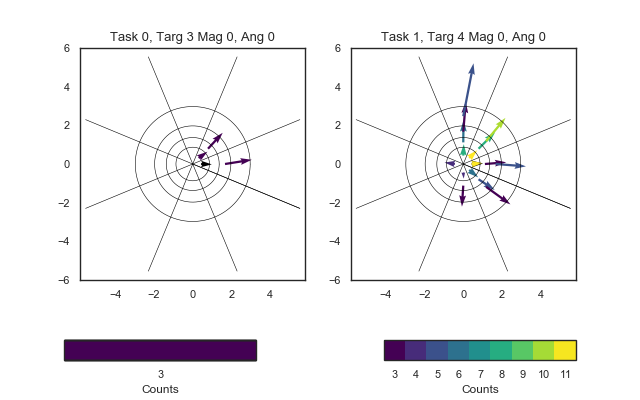

Adding followup tsk 1, m 0, a 0
Adding followup tsk 0, m 0, a 1
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 0, a 6
Adding followup tsk 1, m 0, a 7
Adding followup tsk 1, m 1, a 0
Adding followup tsk 0, m 1, a 1
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 1, a 7
Adding followup tsk 0, m 2, a 0
Adding followup tsk 1, m 2, a 0
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 2
Co mx = 3, mn = 3
Obs mx = 11, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 16


<IPython.core.display.Javascript object>


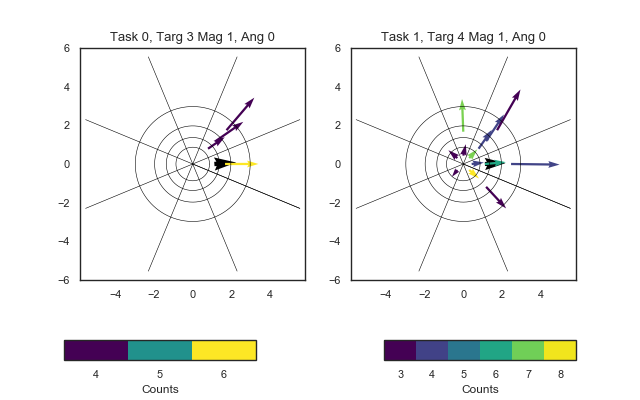

Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 3
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 0, a 7
Adding followup tsk 1, m 1, a 0
Adding followup tsk 0, m 1, a 1
Adding followup tsk 1, m 1, a 1
Adding followup tsk 0, m 2, a 0
Adding followup tsk 0, m 2, a 1
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 0
Adding followup tsk 0, m 3, a 1
Adding followup tsk 1, m 3, a 1
Co mx = 6, mn = 4
Obs mx = 8, mn = 3
Len arrows_dict[0]: 4
Len arrows_dict[1]: 13


<IPython.core.display.Javascript object>


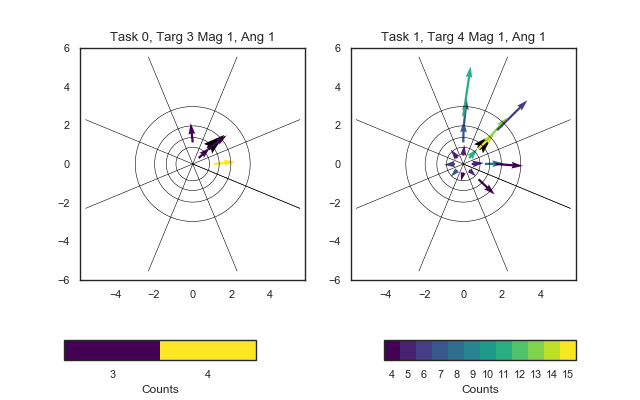

Adding followup tsk 1, m 0, a 0
Adding followup tsk 0, m 0, a 1
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 3
Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 0, a 6
Adding followup tsk 1, m 0, a 7
Adding followup tsk 0, m 1, a 0
Adding followup tsk 1, m 1, a 0
Adding followup tsk 0, m 1, a 1
Adding followup tsk 1, m 1, a 1
Adding followup tsk 0, m 1, a 2
Adding followup tsk 1, m 1, a 2
Adding followup tsk 1, m 1, a 7
Adding followup tsk 1, m 2, a 0
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 3, a 1
Adding followup tsk 1, m 3, a 2
Co mx = 4, mn = 3
Obs mx = 15, mn = 4
Len arrows_dict[0]: 4
Len arrows_dict[1]: 17


<IPython.core.display.Javascript object>


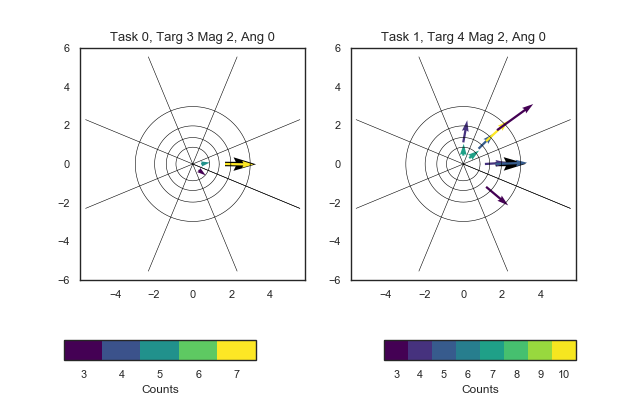

Adding followup tsk 0, m 0, a 0
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 0, m 0, a 7
Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 0, m 2, a 0
Adding followup tsk 1, m 2, a 0
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 7
Adding followup tsk 1, m 3, a 1
Co mx = 7, mn = 3
Obs mx = 10, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 9


<IPython.core.display.Javascript object>


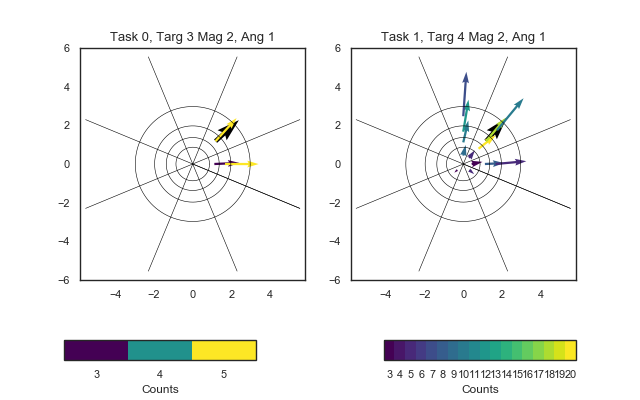

Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 0, a 7
Adding followup tsk 0, m 1, a 0
Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 0, m 2, a 0
Adding followup tsk 1, m 2, a 0
Adding followup tsk 0, m 2, a 1
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 3, a 1
Adding followup tsk 1, m 3, a 2
Co mx = 5, mn = 3
Obs mx = 20, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 13


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


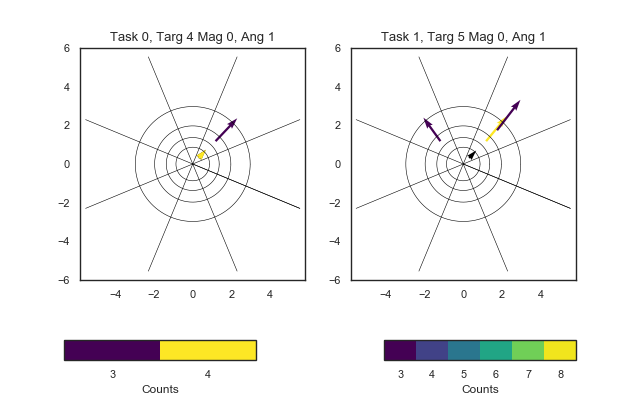

Adding followup tsk 0, m 0, a 1
Adding followup tsk 0, m 2, a 1
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 3
Adding followup tsk 1, m 3, a 1
Co mx = 4, mn = 3
Obs mx = 8, mn = 3
Len arrows_dict[0]: 2
Len arrows_dict[1]: 3


<IPython.core.display.Javascript object>


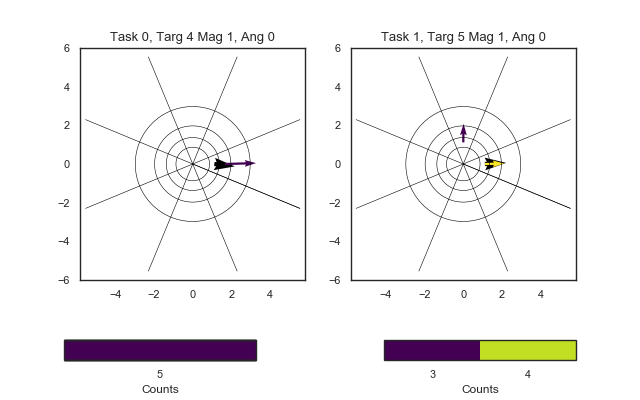

Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 2
Adding followup tsk 0, m 2, a 0
Co mx = 5, mn = 5
Obs mx = 4, mn = 3
Len arrows_dict[0]: 1
Len arrows_dict[1]: 2


<IPython.core.display.Javascript object>


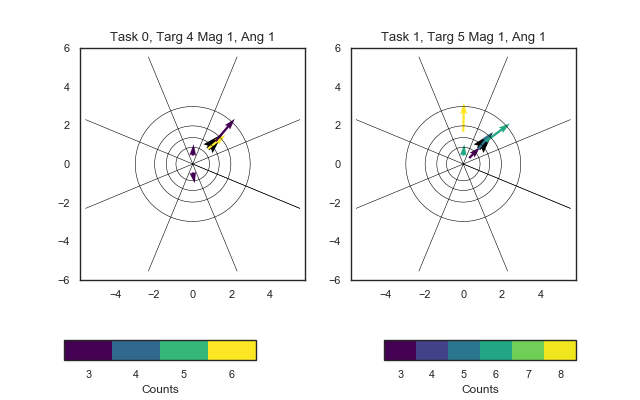

Adding followup tsk 1, m 0, a 1
Adding followup tsk 0, m 0, a 2
Adding followup tsk 1, m 0, a 2
Adding followup tsk 0, m 0, a 6
Adding followup tsk 0, m 1, a 1
Adding followup tsk 1, m 1, a 1
Adding followup tsk 0, m 2, a 1
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 2
Co mx = 6, mn = 3
Obs mx = 8, mn = 3
Len arrows_dict[0]: 4
Len arrows_dict[1]: 5


<IPython.core.display.Javascript object>


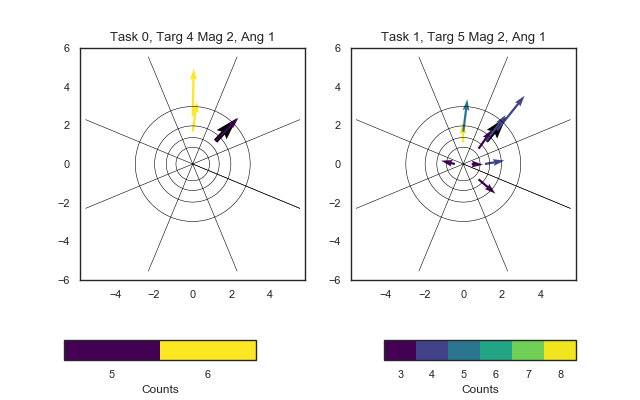

Adding followup tsk 1, m 0, a 0
Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 1, a 0
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 1, m 1, a 7
Adding followup tsk 0, m 2, a 1
Adding followup tsk 1, m 2, a 1
Adding followup tsk 0, m 2, a 2
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 3, a 1
Adding followup tsk 0, m 3, a 2
Co mx = 6, mn = 5
Obs mx = 8, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 9


<IPython.core.display.Javascript object>


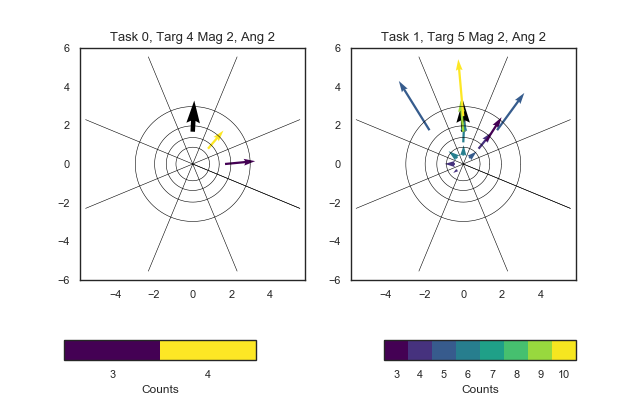

Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 3
Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 0, a 5
Adding followup tsk 0, m 1, a 1
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 0, m 2, a 0
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 3, a 1
Adding followup tsk 1, m 3, a 2
Adding followup tsk 1, m 3, a 3
Co mx = 4, mn = 3
Obs mx = 10, mn = 3
Len arrows_dict[0]: 2
Len arrows_dict[1]: 12


<IPython.core.display.Javascript object>


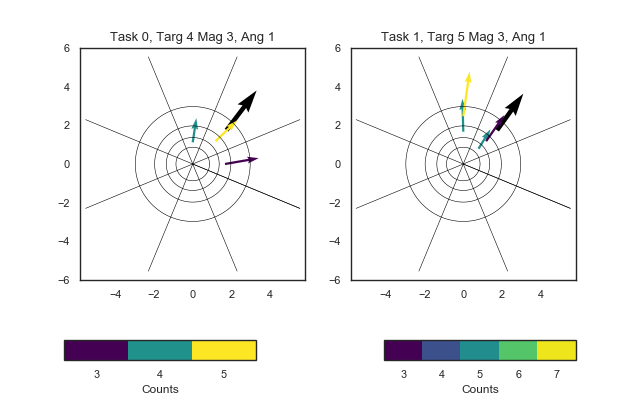

Adding followup tsk 1, m 1, a 1
Adding followup tsk 0, m 1, a 2
Adding followup tsk 0, m 2, a 0
Adding followup tsk 0, m 2, a 1
Adding followup tsk 1, m 2, a 1
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 3, a 2
Co mx = 5, mn = 3
Obs mx = 7, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 4


<IPython.core.display.Javascript object>


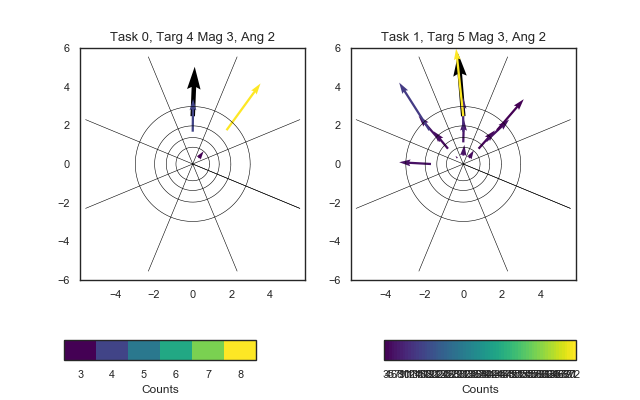

Adding followup tsk 0, m 0, a 1
Adding followup tsk 1, m 0, a 1
Adding followup tsk 1, m 0, a 2
Adding followup tsk 1, m 0, a 3
Adding followup tsk 1, m 1, a 1
Adding followup tsk 1, m 1, a 2
Adding followup tsk 1, m 1, a 3
Adding followup tsk 1, m 2, a 1
Adding followup tsk 0, m 2, a 2
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 2, a 3
Adding followup tsk 1, m 2, a 4
Adding followup tsk 0, m 3, a 1
Adding followup tsk 1, m 3, a 1
Adding followup tsk 1, m 3, a 2
Adding followup tsk 1, m 3, a 3
Co mx = 8, mn = 3
Obs mx = 72, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 13


<IPython.core.display.Javascript object>


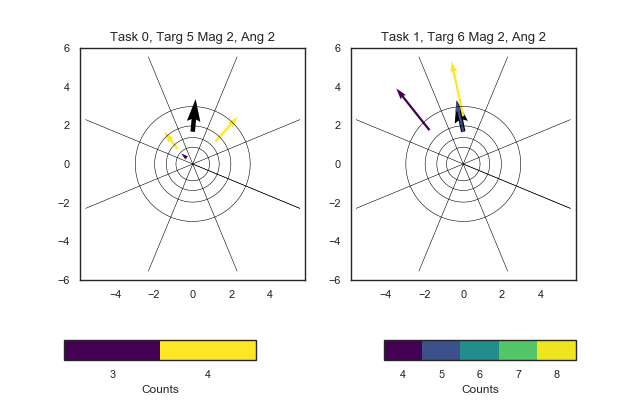

Adding followup tsk 0, m 0, a 3
Adding followup tsk 0, m 1, a 3
Adding followup tsk 0, m 2, a 1
Adding followup tsk 1, m 2, a 2
Adding followup tsk 1, m 3, a 2
Adding followup tsk 1, m 3, a 3
Co mx = 4, mn = 3
Obs mx = 8, mn = 4
Len arrows_dict[0]: 3
Len arrows_dict[1]: 3


<IPython.core.display.Javascript object>


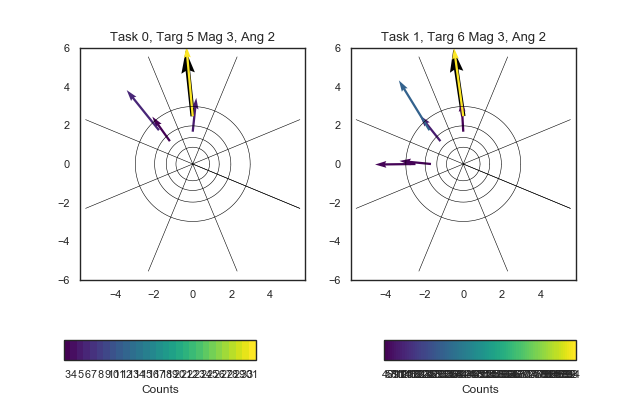

Adding followup tsk 0, m 2, a 2
Adding followup tsk 1, m 2, a 2
Adding followup tsk 0, m 2, a 3
Adding followup tsk 1, m 2, a 3
Adding followup tsk 1, m 2, a 4
Adding followup tsk 0, m 3, a 2
Adding followup tsk 1, m 3, a 2
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 1, m 3, a 4
Co mx = 31, mn = 3
Obs mx = 94, mn = 4
Len arrows_dict[0]: 4
Len arrows_dict[1]: 6


<IPython.core.display.Javascript object>


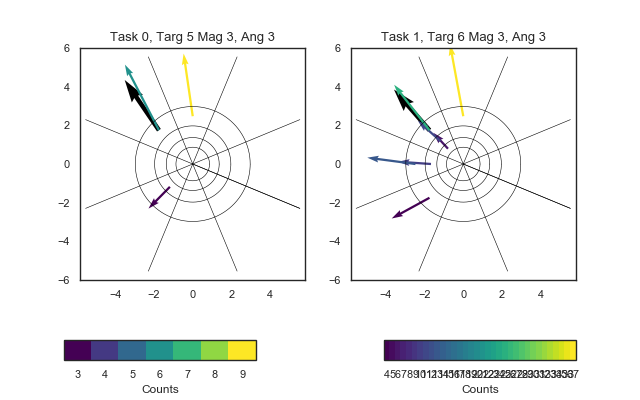

Adding followup tsk 1, m 1, a 3
Adding followup tsk 1, m 2, a 3
Adding followup tsk 1, m 2, a 4
Adding followup tsk 0, m 2, a 5
Adding followup tsk 0, m 3, a 2
Adding followup tsk 1, m 3, a 2
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 1, m 3, a 4
Adding followup tsk 1, m 3, a 5
Co mx = 9, mn = 3
Obs mx = 37, mn = 4
Len arrows_dict[0]: 3
Len arrows_dict[1]: 7


<IPython.core.display.Javascript object>


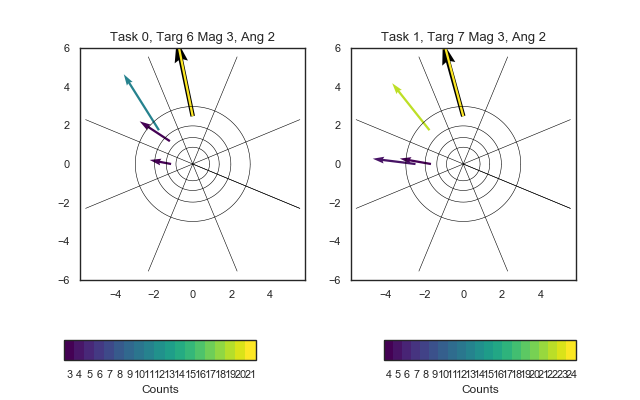

Adding followup tsk 0, m 1, a 4
Adding followup tsk 0, m 2, a 3
Adding followup tsk 1, m 2, a 4
Adding followup tsk 0, m 3, a 2
Adding followup tsk 1, m 3, a 2
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 1, m 3, a 4
Co mx = 21, mn = 3
Obs mx = 24, mn = 4
Len arrows_dict[0]: 4
Len arrows_dict[1]: 4


<IPython.core.display.Javascript object>


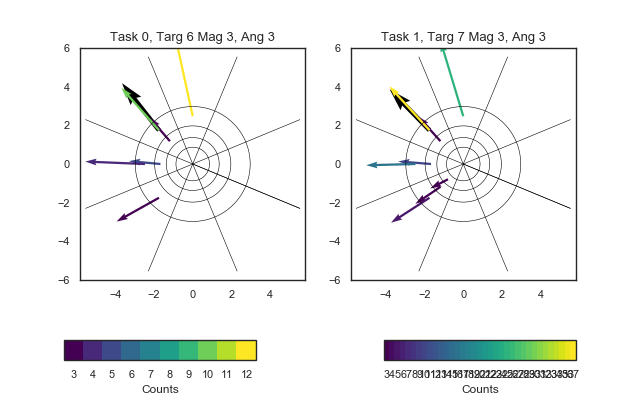

Adding followup tsk 1, m 1, a 5
Adding followup tsk 0, m 2, a 3
Adding followup tsk 1, m 2, a 3
Adding followup tsk 0, m 2, a 4
Adding followup tsk 1, m 2, a 4
Adding followup tsk 1, m 2, a 5
Adding followup tsk 0, m 3, a 2
Adding followup tsk 1, m 3, a 2
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 0, m 3, a 5
Adding followup tsk 1, m 3, a 5
Co mx = 12, mn = 3
Obs mx = 37, mn = 3
Len arrows_dict[0]: 6
Len arrows_dict[1]: 8


<IPython.core.display.Javascript object>


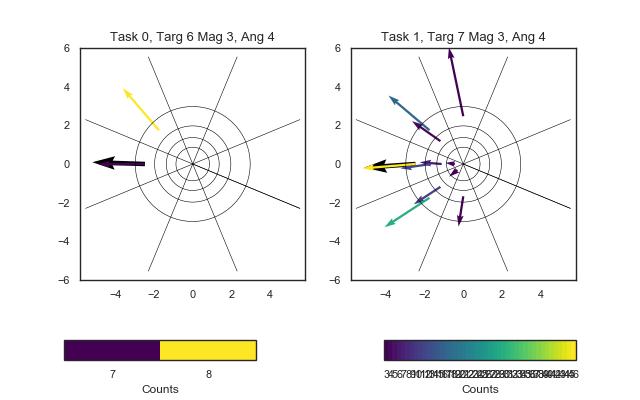

Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 1, a 4
Adding followup tsk 1, m 2, a 3
Adding followup tsk 1, m 2, a 4
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 6
Adding followup tsk 1, m 3, a 2
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 1, m 3, a 5
Co mx = 8, mn = 7
Obs mx = 46, mn = 3
Len arrows_dict[0]: 2
Len arrows_dict[1]: 11


<IPython.core.display.Javascript object>


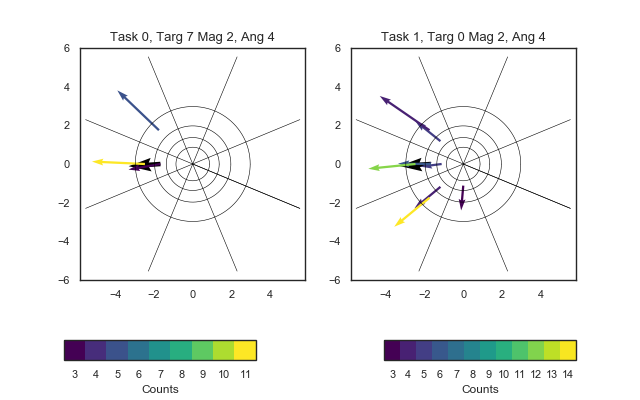

Adding followup tsk 1, m 1, a 4
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 2, a 3
Adding followup tsk 0, m 2, a 4
Adding followup tsk 1, m 2, a 4
Adding followup tsk 1, m 2, a 5
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 1, m 3, a 5
Co mx = 11, mn = 3
Obs mx = 14, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 8


<IPython.core.display.Javascript object>


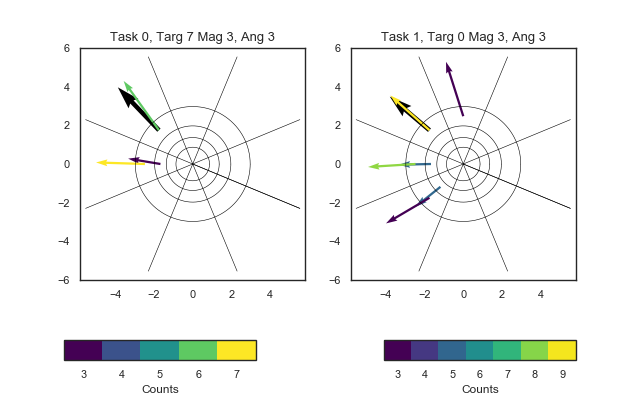

Adding followup tsk 0, m 2, a 4
Adding followup tsk 1, m 2, a 4
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 3, a 2
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 1, m 3, a 5
Co mx = 7, mn = 3
Obs mx = 9, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 6


<IPython.core.display.Javascript object>


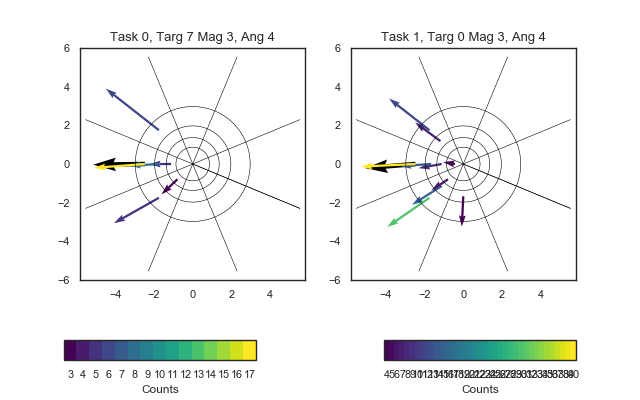

Adding followup tsk 1, m 0, a 4
Adding followup tsk 0, m 1, a 4
Adding followup tsk 1, m 1, a 4
Adding followup tsk 0, m 1, a 5
Adding followup tsk 1, m 1, a 5
Adding followup tsk 1, m 2, a 3
Adding followup tsk 0, m 2, a 4
Adding followup tsk 1, m 2, a 4
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 3, a 3
Adding followup tsk 1, m 3, a 3
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 0, m 3, a 5
Adding followup tsk 1, m 3, a 5
Co mx = 17, mn = 3
Obs mx = 40, mn = 4
Len arrows_dict[0]: 6
Len arrows_dict[1]: 10


<IPython.core.display.Javascript object>


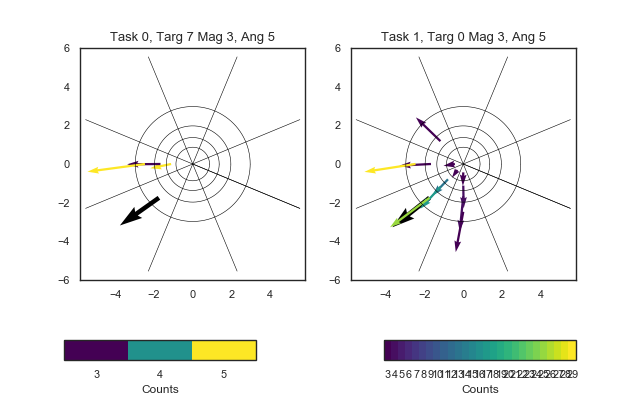

Adding followup tsk 1, m 0, a 4
Adding followup tsk 1, m 0, a 5
Adding followup tsk 1, m 0, a 6
Adding followup tsk 0, m 1, a 4
Adding followup tsk 1, m 1, a 5
Adding followup tsk 1, m 1, a 6
Adding followup tsk 1, m 2, a 3
Adding followup tsk 0, m 2, a 4
Adding followup tsk 1, m 2, a 4
Adding followup tsk 1, m 2, a 5
Adding followup tsk 1, m 2, a 6
Adding followup tsk 0, m 3, a 4
Adding followup tsk 1, m 3, a 4
Adding followup tsk 1, m 3, a 5
Adding followup tsk 1, m 3, a 6
Co mx = 5, mn = 3
Obs mx = 29, mn = 3
Len arrows_dict[0]: 3
Len arrows_dict[1]: 12


In [140]:
#### Saving ###

save_dir = '/Users/preeyakhanna/Dropbox/Carmena_Lab/Documentation/BMI_co_obs_paper/data/action_distributions'
for tg0 in range(8):
    tg1 = np.mod(tg0+1, 8)
    plot_pred(command_bins, push, trg, tsk, trl, mag_boundaries[animal, day], 
          targ0 = tg0, targ1 = tg1, min_obs = 20, min_obs2 = 3, arrow_scale=.01, 
          lims = 6, prefix='day0_minobs_20_3', save = True, save_dir = save_dir)

In [138]:
def plot_pred(command_bins, push, trg, tsk, trl, mag_bound, targ0 = 0., targ1 = 1., min_obs = 20, min_obs2 = 5,
             arrow_scale = .004, lims = 5, prefix = '', save = False, save_dir = None): 
    
    ### Get the mean angle / magnitudes ###
    ang_mns = np.linspace(0, 2*np.pi, 9)
    mag_mns = [np.mean([0., mag_bound[0]])]
    for i in range(2):
        mag_mns.append(np.mean([mag_bound[i], mag_bound[i+1]]))
    mag_mns.append(np.mean([mag_bound[2], mag_bound[2] + 1]))
    
    
    ### INDEX LEVEL 1 -- Get all the trg0 / trg1 data; 
    ix0 = np.nonzero(np.logical_and(trg == targ0, tsk == 0))[0]
    ix1 = np.nonzero(np.logical_and(trg == targ1, tsk == 1))[0]
    
    ### For the CO task go through commands and get the ones with enough observations ;
    com0 = command_bins[ix0, :]
    com1 = command_bins[ix1, :]
    
    psh0 = push[ix0, :]
    psh1 = push[ix1, :]
    
    trl0 = trl[ix0]
    trl1 = trl[ix1]
    
    trg0 = trg[ix0]
    trg1 = trg[ix1]
    
    
    ### Go through -- which bins have enough min_obs in both tasks; 
    keep = []
    for m in range(4):
        for a in range(8):
            
            ### INDEX LEVEL 2 -- Indices to get the mag / angle from each task 
            i0 = np.nonzero(np.logical_and(com0[:, 0] == m, com0[:, 1] == a))[0]
            i1 = np.nonzero(np.logical_and(com1[:, 0] == m, com1[:, 1] == a))[0]
            
            ### Save these ###
            if np.logical_and(len(i0) >= min_obs, len(i1) >= min_obs):
                
                ### Add the m / a / indices for this so we can go through them later; 
                keep.append([m, a, i0.copy(), i1.copy()])
    
    ### Now for each for these, plot the main thing; 
    for i_m, (m, a, i0, i1) in enumerate(keep):
        
        ### Make a figure centered on this command; 
        fig, ax_all = plt.subplots(ncols = 2, figsize = (8, 5))
        fig.subplots_adjust(bottom=0.3)
        for ia, (ax, tgi) in enumerate(zip(ax_all, [targ0, targ1])):
            
            ### Set the axis to square so the arrows show up correctly 
            ax.axis('equal')
            title_string = 'cotg%d_obstg%d_mag%d_ang%d' %(targ0, targ1, m, a)
            
            ax.set_title('Task %d, Targ %d Mag %d, Ang %d' %(ia, tgi, m, a))

            ### Plot the division lines; 
            for A in np.linspace(-np.pi/8., (2*np.pi) - np.pi/8., 9):
                ax.plot([0, lims*np.cos(A)], [0, lims*np.sin(A)], 'k-', linewidth=.5)
            
            ### Plot the circles 
            t = np.arange(0, np.pi * 2.0, 0.01)
            tmp = [0] + mag_bound + [mag_bound[2] + 1]
            for mm in tmp:
                x = mm * np.cos(t)
                y = mm * np.sin(t)
                ax.plot(x, y, 'k-', linewidth = .5)
        
        ### Get mean neural push for each task ###
        mn0 = np.mean(psh0[i0, :], axis=0)
        mn1 = np.mean(psh1[i1, :], axis=0)
        
        ### Plot this mean neural push as big black arrow ###
        ax_all[0].quiver(mag_mns[m]*np.cos(ang_mns[a]), mag_mns[m]*np.sin(ang_mns[a]), mn0[0], mn0[1], 
                  width=arrow_scale*2, color = 'k', angles='xy', scale=1, scale_units='xy')
        
        ax_all[1].quiver(mag_mns[m]*np.cos(ang_mns[a]), mag_mns[m]*np.sin(ang_mns[a]), mn1[0], mn1[1], 
                  width=arrow_scale*2, color = 'k', angles='xy', scale=1, scale_units='xy')             
        
        ### ADJUSTMENT TO LEVEL 2 -- Now get the NEXT action commands ###
        i0p1 = i0 + 1; 
        i1p1 = i1 + 1; 
        
        ### If exceeds length after adding "1"
        if i0p1[-1] > (len(trl0) -1):
            i0p1 = i0p1[:-1]
        if i1p1[-1] > (len(trl1) -1):
            i1p1 = i1p1[:-1]
        ### Remove the commands that are equal to the minimum bin_cnt (=1) 
        ### because they spilled over from the last trial ###
        kp0 = np.nonzero(trl0[i0p1] > 1)[0]
        kp1 = np.nonzero(trl1[i1p1] > 1)[0]
        
        ### Keep these guys ###
        i0p1 = i0p1[kp0]
        i1p1 = i1p1[kp1]
        
        ### Arrows dict 
        ### We need to create this because we're not sure how big to maek the colormap when plotting; 
        arrows_dict = {}
        arrows_dict[0] = []
        arrows_dict[1] = []
        
        index_dict = {}
        index_dict[0] = []
        index_dict[1] = []
        
        ### These should all be the same target still ###
        assert(np.all(trg0[i0p1] == targ0))
        assert(np.all(trg1[i1p1] == targ1))
        
        ### Iterate through the tasks ###

        for m in range(4):
            for a in range(8):
                ### LEVEL 3 -- OF THE NEXT ACTION COMMANDS, which match the action #####
                j0 = np.nonzero(np.logical_and(com0[i0p1, 0] == m, com0[i0p1, 1] == a))[0]
                j1 = np.nonzero(np.logical_and(com1[i1p1, 0] == m, com1[i1p1, 1] == a))[0]

                for i_, (index, index_og, pshi) in enumerate(zip([j0, j1], [i0p1, i1p1], [psh0, psh1])):
                    if len(index) >= min_obs2:
                        print('Adding followup tsk %d, m %d, a %d' %(i_, m, a))

                        ### Great plot this;
                        mn_next_action = np.mean(pshi[index_og[index], :], axis=0)
                        xi = mag_mns[m]*np.cos(ang_mns[a])
                        yi = mag_mns[m]*np.sin(ang_mns[a])
                        vx = mn_next_action[0];
                        vy = mn_next_action[1]; 

                        arrows_dict[i_].append([copy.deepcopy(xi), copy.deepcopy(yi), 
                                                 copy.deepcopy(vx), copy.deepcopy(vy), len(index)])
                        index_dict[i_].append(len(index))

        
        #import pdb; pdb.set_trace()
        ### Now figure out the color lists for CO / OBS separately; 
        mx_co = np.max(np.hstack((index_dict[0])))
        mn_co = np.min(np.hstack((index_dict[0])))
        co_cols = np.linspace(0., 1., mx_co - mn_co + 1)
        co_colors = [cm.viridis(x) for x in co_cols]
        print('Co mx = %d, mn = %d' %(mx_co, mn_co))
        
        mx_ob = np.max(np.hstack((index_dict[1])))
        mn_ob = np.min(np.hstack((index_dict[1])))
        obs_cols = np.linspace(0., 1., mx_ob - mn_ob+1)
        obs_colors = [cm.viridis(x) for x in obs_cols]
        print('Obs mx = %d, mn = %d' %(mx_ob, mn_ob))
        
        for tsk, (mnN, cols) in enumerate(zip([mn_co, mn_ob], [co_colors, obs_colors])):
            
            print('Len arrows_dict[%d]: %d' %(tsk, len(arrows_dict[tsk])))
            ### go through all the arrows;
            for arrow in arrows_dict[tsk]:
                
                ### Parse the parts 
                xi, yi, vx, vy, N = arrow; 
                
                ### Plot it;
                ax_all[tsk].quiver(xi, yi, vx, vy,
                                  width = arrow_scale, color = cols[N - mnN], 
                                    angles='xy', scale=1, scale_units='xy')

        for ia, ax in enumerate(ax_all):
            ax.set_xlim([-lims, lims])
            ax.set_ylim([-lims, lims])
            
        ### Set colorbar; 
        cmap = mpl.cm.viridis
        if mn_co == mx_co:
            norm = mpl.colors.Normalize(vmin=mn_co, vmax=mx_co+.1)
        else:
            norm = mpl.colors.Normalize(vmin=mn_co, vmax=mx_co)
        cax0 = fig.add_axes([0.1, 0.1, 0.3, 0.05])
        cb1 = mpl.colorbar.ColorbarBase(cax0, cmap=cmap,
                            norm=norm, orientation='horizontal',
                            boundaries = np.arange(mn_co-0.5, mx_co+1.5, 1.))
        cb1.set_ticks(np.arange(mn_co, mx_co+1))
        cb1.set_ticklabels(np.arange(mn_co, mx_co+1))

            
        
        cb1.set_label('Counts')
        if mn_ob == mn_ob:
            norm = mpl.colors.Normalize(vmin=mn_ob, vmax=mx_ob+.1)
        else:
            norm = mpl.colors.Normalize(vmin=mn_ob, vmax=mx_ob)
        cax1 = fig.add_axes([0.6, .1, .3, .05])
        cb1 = mpl.colorbar.ColorbarBase(cax1, cmap=cmap,
                            norm=norm, orientation='horizontal',
                            boundaries = np.arange(mn_ob-0.5, mx_ob+1.5, 1.))
        cb1.set_label('Counts')
        cb1.set_ticks(np.arange(mn_ob, mx_ob+1))
        cb1.set_ticklabels(np.arange(mn_ob, mx_ob+1)) 
        
        
        ### Save this ? 
        if save:
            fig.savefig(save_dir+'/'+prefix+'_'+title_string+'.png')